In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from parse_dataset import parse_data
%matplotlib inline

os.chdir("/Users/enrico.t/code/ml-reference-implementations")
df = parse_data('data/babI/tasks_1-20_v1-2/en/qa1_single-supporting-fact_train.txt')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=['is', 'the', 'to', 'where'])
corpus = df['fact1'].tolist() + df['fact2'].tolist() + df['question'].tolist() + df['answer'].tolist()
vectorizer.fit(corpus)

y_train = df['answer']
X_train = pd.concat([
        pd.DataFrame(vectorizer.transform(df['fact1']).todense(), columns=vectorizer.get_feature_names()), 
        pd.DataFrame(vectorizer.transform(df['fact2']).todense(), columns=vectorizer.get_feature_names()), 
        pd.DataFrame(vectorizer.transform(df['question']).todense(), columns=vectorizer.get_feature_names())
    ], 
    axis=1)

df_test = parse_data('data/babI/tasks_1-20_v1-2/en/qa1_single-supporting-fact_test.txt')

y_test = df_test['answer']
X_test = pd.concat([
        pd.DataFrame(vectorizer.transform(df_test['fact1']).todense(), columns=vectorizer.get_feature_names()), 
        pd.DataFrame(vectorizer.transform(df_test['fact2']).todense(), columns=vectorizer.get_feature_names()), 
        pd.DataFrame(vectorizer.transform(df_test['question']).todense(), columns=vectorizer.get_feature_names())
    ], 
    axis=1)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameter_grid = { 
    'n_estimators': [10, 100],    
    'max_depth': [5, 10, 20], 
    'max_features': [5, 10, 20, 40] + ['sqrt', 'log2', None],
    'criterion': ['entropy', 'gini'],
    # 'min_samples_split': range(2,10),
    # 'min_samples_leaf': range(1,10),
    # 'max_leaf_nodes': range(2,10) + [None],
}

gs = GridSearchCV(
    RandomForestClassifier(),
    param_grid=parameter_grid,
    cv=5
)

gs.fit(X_train, y_train)

/Users/enrico.t/code/ml-reference-implementations/venv/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 'estimator__bootstrap': True,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 'warn',
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_stat

In [36]:
from pandas_ml import ConfusionMatrix

print gs.score(X=X_test, y=y_test)

y_predict = gs.predict(X_test)

0.597


In [37]:
cm = ConfusionMatrix(y_test, y_predict)
cm.print_stats()

Confusion Matrix:

Predicted  bathroom  bedroom  garden  hallway  kitchen  office  __all__
Actual                                                                 
bathroom         90       13      18        8       11       9      149
bedroom          16      101      15        9       15      15      171
garden           11       21     113       10       16      16      187
hallway          10       12      19       89       11      13      154
kitchen          11        9      16        6       99      16      157
office           22       11      22       11       11     105      182
__all__         160      167     203      133      163     174     1000


Overall Statistics:

Accuracy: 0.597
95% CI: (0.5658500437642712, 0.6275771456439941)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.4457512351329107e-162
Kappa: 0.5155673571735098
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                 bathroom    bedroom     garden  \
Population              

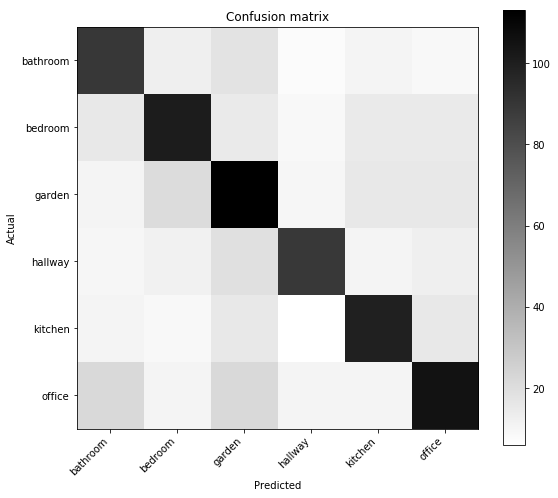

In [38]:
cm.plot()

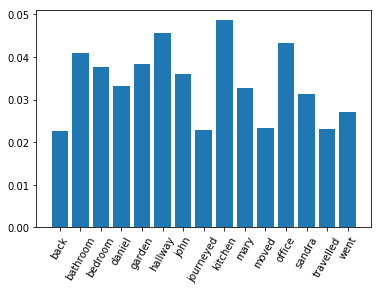

In [41]:
plt.bar(X_train.columns, gs.best_estimator_.feature_importances_)
plt.xticks(rotation=60)
plt.show()

In [42]:
print gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
